In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
# import openweathermapy as ow

# Import API key
from api_keys import api_key

# # Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # # # Output File (CSV)
output_data_file = "output_data/cities.csv"


# # # # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#set counter
cities_count = []
city_number = 0

# Create a set of random lat and lng combinations 
#adjusted lats to reduce number of random numbers that are close to the poles,
#to eliminate overinclusion of "closest" cities that are on southern/northern coasts
#based on http://3.bp.blogspot.com/-8rTAYTBa3vk/T2a1jio5P1I/AAAAAAAAAdg/k8Tu9m3uazw/s1600/Isotope+amplitude_Population.jpg
#original source http://www.radicalcartography.net/index.html?histpop

lats = np.random.uniform(low=-50.000, high=80.000, size=1500)
#adjusting lngs to reduce number of random outputs in the deep pacific ocean
#to eliminate overinclusion of "closest" cities on pacific coast
#source ibid 

lngs = np.random.uniform(low=-130.000, high=170.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
          cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

822

In [60]:
weather_data = pd.DataFrame(cities)

weather_data.columns = ["City"]

weather_data["city_temp"] = ""
weather_data["city_lat"] = ""
weather_data["city_hum"] = ""
weather_data["city_cloud"] = ""
weather_data["city_wind"] = ""


weather_data.head()

,City,city_temp,city_lat,city_hum,city_cloud,city_wind
0,warrington,,,,,
1,severo-kurilsk,,,,,
2,tripoli,,,,,
3,yarensk,,,,,
4,albany,,,,,


## Perform API Calls

In [61]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
counter = 0
weather_data=[]

print("Beginning Data Retrieval")
print("________________________________")

for city in cities:
    
    try: 

        response = requests.get(f"{url}&q={city}").json()
        city_temp = response["main"]["temp"]
        city_lat = response["coord"]["lat"]
        city_hum = response["main"]["humidity"]
        city_cloud = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        
        print(f"Processing record {counter}:{city}")
        print(f"{url}&q={city}")
        counter = counter + 1

    
        
        weather_data.append({"city": city,
                          "city_temp": city_temp, 
                          "city_lat": city_lat, 
                          "city_hum": city_hum,
                          "city_cloud": city_cloud,
                          "city_wind":city_wind})

    except: 
        print(f"{city} - no results") 
        
# print(weather_data)


        

Beginning Data Retrieval
________________________________
Processing record 0:warrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=warrington
Processing record 1:severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=severo-kurilsk
Processing record 2:tripoli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=tripoli
Processing record 3:yarensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=yarensk
Processing record 4:albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=albany
Processing record 5:jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=jamestown
Processing record 6:bambous virieux
http://api.openweathermap.org/data/2.5/weather?uni

Processing record 57:mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=mahebourg
ahumada - no results
Processing record 58:arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=arraial do cabo
Processing record 59:upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=upernavik
Processing record 60:bereznik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=bereznik
Processing record 61:ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=ukiah
Processing record 62:jaguarari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=jaguarari
Processing record 63:codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed

Processing record 114:gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=gao
Processing record 115:dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=dali
Processing record 116:terrace
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=terrace
Processing record 117:bugiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=bugiri
Processing record 118:granada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=granada
Processing record 119:jabinyanah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=jabinyanah
Processing record 120:sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=sao filipe
Processing record

Processing record 171:sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=sambava
Processing record 172:cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=cabo san lucas
Processing record 173:salgueiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=salgueiro
jhikargachha - no results
Processing record 174:bilari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=bilari
Processing record 175:henderson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=henderson
Processing record 176:chiang rai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=chiang rai
Processing record 177:gambo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f

Processing record 227:moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=moose factory
Processing record 228:kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=kieta
Processing record 229:nizwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=nizwa
Processing record 230:dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=dwarka
Processing record 231:faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=faya
Processing record 232:zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=zyryanka
Processing record 233:san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=san juan
Processing re

Processing record 284:kjopsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=kjopsvik
Processing record 285:colimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=colimes
Processing record 286:new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=new norfolk
Processing record 287:mandal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=mandal
Processing record 288:dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=dikson
Processing record 289:agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=agadir
Processing record 290:rocky mountain house
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=rock

Processing record 341:bystrzyca klodzka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=bystrzyca klodzka
Processing record 342:maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=maceio
Processing record 343:krasnyy klyuch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=krasnyy klyuch
Processing record 344:teguise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=teguise
Processing record 345:salamiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=salamiyah
Processing record 346:conakry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=conakry
Processing record 347:elat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983dd

Processing record 397:altamira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=altamira
Processing record 398:bucerias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=bucerias
Processing record 399:dong hoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=dong hoi
Processing record 400:solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=solnechnyy
Processing record 401:padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=padang
Processing record 402:general pico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=general pico
kazalinsk - no results
buon me thuot - no results
ningan - no results
Processing record 403:krasnogorsk
http://api.openweathermap.org/

Processing record 454:zhatay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=zhatay
Processing record 455:wewak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=wewak
Processing record 456:macklin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=macklin
Processing record 457:ouidah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=ouidah
Processing record 458:acushnet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=acushnet
Processing record 459:lingdong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=lingdong
Processing record 460:isla mujeres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=isla mujeres
Process

Processing record 511:normandin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=normandin
Processing record 512:dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=dingle
Processing record 513:roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=roma
Processing record 514:kwinana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=kwinana
Processing record 515:manavalakurichi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=manavalakurichi
Processing record 516:esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=esperance
Processing record 517:shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=shir

Processing record 568:fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=fort-shevchenko
tabiauea - no results
ngukurr - no results
Processing record 569:clive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=clive
Processing record 570:tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=tazovskiy
Processing record 571:moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=moron
kamenskoye - no results
Processing record 572:illora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=illora
ust-kamchatsk - no results
Processing record 573:tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=tigil
Processing record 574:eustis
http://api.openweathermap

Processing record 624:plast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=plast
Processing record 625:muscle shoals
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=muscle shoals
Processing record 626:tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=tuktoyaktuk
Processing record 627:orocue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=orocue
Processing record 628:abay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=abay
Processing record 629:kadnikov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=kadnikov
Processing record 630:oskemen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=oskemen
niz

Processing record 680:clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=clyde river
bur gabo - no results
Processing record 681:diamantino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=diamantino
bokspits - no results
Processing record 682:port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=port-cartier
Processing record 683:pitiquito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=pitiquito
Processing record 684:vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=vestmanna
Processing record 685:sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=sao jose da coroa grande
Processing record 686:barra do garcas
http:/

Processing record 736:tulsipur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=tulsipur
of - no results
Processing record 737:maslovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=maslovka
Processing record 738:carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=carutapera
loubomo - no results
Processing record 739:miranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=miranda
Processing record 740:tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=tromso
Processing record 741:isiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006ca983ddc0ab37e74&q=isiro
Processing record 742:vilcun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e2d0f87701ed006

In [83]:
df = pd.DataFrame(weather_data)

df.head()       

,city,city_cloud,city_hum,city_lat,city_temp,city_wind
0,warrington,75,87,53.39,56.14,10.29
1,severo-kurilsk,12,100,50.68,44.68,3.94
2,tripoli,75,45,37.51,68.00,12.75
3,yarensk,88,100,62.17,37.66,6.96
4,albany,75,52,42.65,65.43,4.70


In [91]:
#Utilize .describe to determine mean latitude for dataset

df.describe()

#Utilize .describe to determine mean latitude for dataset, based on my adjustments in the randomization. 
#I got a lot more results (over 700!) but the mean city lat is 7 degrees below the data cited at 
#this site (http://www.radicalcartography.net/index.html?histpop), in the year 2000:  
#". . . about half the world’s population lives north of 27°N.""

#Expanded set got me two outlier values - 328% humidity in Matara (??) and 84 mph winds in st. george. 
#going to filter these out when I plot. 

,city_cloud,city_hum,city_lat,city_temp,city_wind
count,747.000000,747.000000,747.000000,747.000000,747.000000
mean,37.425703,77.796519,20.479612,63.715368,7.864511
std,35.865414,23.866729,30.656091,16.603601,6.192833
min,0.000000,2.000000,-51.620000,8.230000,0.250000
25%,0.000000,66.000000,-3.495000,50.440000,3.360000
50%,32.000000,84.000000,23.920000,66.910000,6.170000
75%,75.000000,95.000000,46.310000,76.195000,11.410000
max,100.000000,328.000000,78.220000,101.200000,84.110000


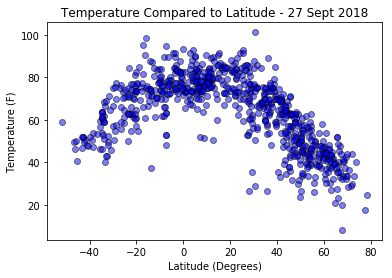

In [92]:

# Temperature (F) vs. Latitude
temp_lat = plt.scatter(df["city_lat"], df["city_temp"], marker="o", facecolors="blue", edgecolors="black", alpha=.5)

plt.title("Temperature Compared to Latitude - 27 Sept 2018")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (Degrees)")

plt.savefig("temperature_vs_latitude.png") 

plt.show()

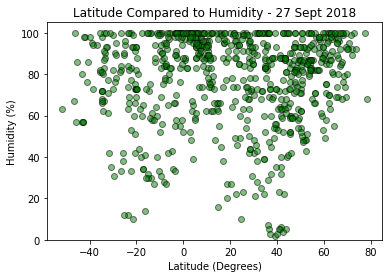

In [93]:
# Humidity (%) vs. Latitude

temp_hum = plt.scatter(df["city_lat"], df["city_hum"],marker="o", facecolors="green", edgecolors="black", alpha=.5)
#set limit to take out outlier value of 328 (??)
plt.ylim(0, 105)

plt.title("Latitude Compared to Humidity - 27 Sept 2018")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Degrees)")

plt.savefig("latitude_vs_humidity.png") 

plt.show()

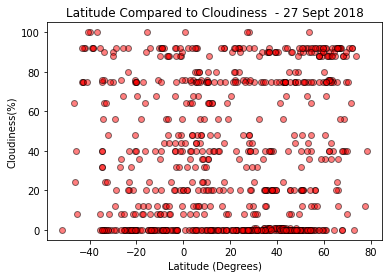

In [94]:
# Cloudiness (%) vs. Latitude
temp_cloud = plt.scatter(df["city_lat"], df["city_cloud"],marker="o", facecolors="red", edgecolors="black", alpha=.5)

plt.title("Latitude Compared to Cloudiness  - 27 Sept 2018")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude (Degrees)")

plt.savefig("latitude_vs_cloudiness.png") 

plt.show()


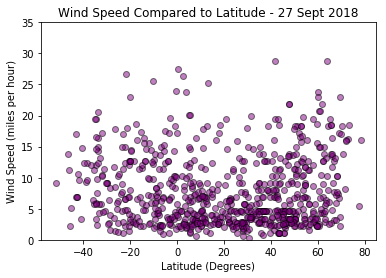

In [95]:
# Wind Speed (mph) vs. Latitude

lat_cloud = plt.scatter(df["city_lat"], df["city_wind"],marker="o", facecolors="purple", edgecolors="black", alpha=.5)
plt.ylim(0, 35)

plt.title("Wind Speed Compared to Latitude - 27 Sept 2018")
plt.ylabel("Wind Speed (miles per hour)")
plt.xlabel("Latitude (Degrees)")

plt.savefig("latitude_vs_windspeed") 

plt.show()

In [90]:
#Export csv file 

df.to_csv(path_or_buf="city_dataset.csv")

In [73]:
#This is from when i was trying to use the wrapper - didn't work! 
# summary = ["main.temp", "coord.lat", "clouds.all", "wind.speed"]

# # # # Create a Pandas DataFrame with the results
# data = [response(*summary) for response in weather_data]

# data

# # weather_plot = pd.DataFrame(data, index=cities_list)
